# Optimization methods

Optimization methods allows you to find local/global maxima/minima maybe under some restrictions. These methods can be quite elaborated and might need to be optimized. For this reason, it is advisable to use libraries tailored to these kind of tasks. 

For a simple example of optimization, consider a bungee jumper that jumps upward at a specified velocity (example from Chapra Chapter 7). If the jumper is subjected to drag, its altitude $z$ can be computed as 

\begin{equation}
z = z_0 + \frac{m}{c}\left( v_0 + \frac{mg}{c} \right) (1 - e^{-(c/m)t}) - \frac{mg}{c}t,
\end{equation}
where $c$ is the drag coefficient. If we use $g = 9.81$ m/s$^2$, $z_0 = 100$ m, $v_0 = 55$ m/s, $m = 80$ kg, and $c = 15$ kg/s, one obtains something like 
<img src="fig/example-z.png">

You might answer:
* How to find this maximum programatically? 
* How to find how it depends on $c$? 
these are the questions that an optimization method can answer.

In `scipy`, the general `optimization` module gives many tools to optimize, for intance, a multi-variate function under constrains. See the general docs: https://docs.scipy.org/doc/scipy/reference/optimize.html 

## Exercise
Plot the previous figure but use several values for $c$. Does the maximum depends on it? can you extract the dependence between the maximum and $c$? Does the maximum depend also on $m$?

# Optimization details
## Root finding?
The problem of finding the maximum/minimum of a function is related with the problem of root finding, but it is not equivalent, since we are looking for roots on the derivatives, not the function itself, as the following picture shows:
<img src="fig/opt-01.png" style="width:600px">

As you can see, you need both the first and second derivative to make sure you are finding a maximum/minimum.

## One dimensional and multi-dimensional optimization
You can also have the problem of finding an extremum that depends on several variables (like the maximum height $z$ as a function of both $c$ and $m$), as the next figure shows
<img src="fig/opt-02.png" style="width:600px">

## Local and global extrema
And, finally, you need to take into account the possible existence of local and global maximum/minimum, as illustrated in the following
<img src="fig/opt-03.png" style="width:600px">

# Traditional methods (one-dimensional optimization)
* Golden ratio search : Based on the golden ratio number, similar to binary search.
* Parabolic interpolation : Uses interpolation to minimize the evaluation of the function.
* Newton-Raphson : Applies the same Newton-Raphson method but for the derivatives.
* Brent method: Same as the previous (apply brents method to the derivatives)

# One-dimensional/Uni-variate optimization with `scipy`
`Scipy` offers the module `optmize` to perform optimization tasks, and inside it you can use several methods (read the docs for each one):
* `golden` : Uses the golden ratio method inside some interval. Returns the minimim of a given function.
* `brent` : Improved method that converges faster than `golden`
* `fminbound` : Allows to restrict the solution to a given interval.
* `minimize_scalar` : General method to minimize a scalar function, where you can select the method to use as argument (`golden`, `brent`, etc). The solution is a bunch object with much more information. **You should use this function to solve uni-variate problems.** You cand find the docs at https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar  

In the following you can find some examples for `minimize_scalar`, extracted from the actual manual. 

In [15]:
# function to minimize
def f(x):
    #return np.where(x <= 0, -x, (x - 2) * x * (x + 2)**2)
    return (x - 2) * x * (x + 2)**2

# import the function
from scipy.optimize import minimize_scalar
res = minimize_scalar(f)
x1 = res.x
print("The solution is : ", x1)

# And this is a bounded method to find the solution inside some given interval
res = minimize_scalar(f, bounds=(-3, -1), method='bounded')
x2 = res.x
print("The bounded solution is : ", x2)

The solution is :  1.2807764040333458
The bounded solution is :  -2.000000202597239


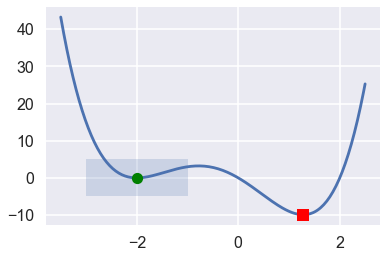

In [12]:
%matplotlib inline
# Let's plot the function
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); sns.set_context('poster')
import numpy as np

x = np.linspace(-3.5, 2.5, 200)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.plot(x1, f(x1), 'rs')
ax.plot(x2, f(x2), 'go')
ax.add_patch(plt.Rectangle((-3, -5), 2, 10, alpha=0.2, fill=True))

## Exercise 
Use the previous methods to compute the minimum of the next function,
\begin{equation}
f(x) = \frac{x^2}{10} - 2\sin x
\end{equation}
Plot the function and verify that all methods are finding the right minimum.

## Exercise
Compute the minimum for the function
\begin{equation}
f(x) = x^2(1+3\cos x\  e^{-(x-0.1)^2/10})
\end{equation}

The solution is :  0.0


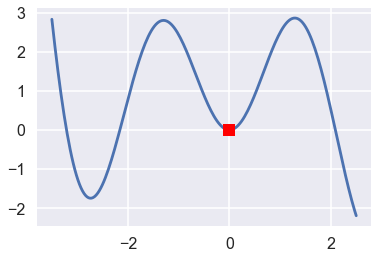

In [18]:
# function to minimize
def f(x):
    #return np.where(x <= 0, -x, (x - 2) * x * (x + 2)**2)
    return x*x*(1 + 3*np.cos(x)*np.exp(-(x-0.1)**2/10))

# import the function
from scipy.optimize import minimize_scalar
res = minimize_scalar(f)
x1 = res.x
print("The solution is : ", x1)

%matplotlib inline
# Let's plot the function
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); sns.set_context('poster')
import numpy as np

x = np.linspace(-3.5, 2.5, 200)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.plot(x1, f(x1), 'rs')
#ax.plot(x2, f(x2), 'go')
#ax.add_patch(plt.Rectangle((-3, -5), 2, 10, alpha=0.2, fill=True))

## Exercise (from Miguel Uribe)

<img src="fig/F1.png" alt="Annotation Examples" style="width:400px">

Suppose you plan to go from point $A$ to point $B$. $A$ is separated from $B$ by a total of 20880m, however, to go from $A$ to $B$ you have to travel a distance $L_A$ using a car and a distance $L_B$ using a boat. $x$ marks the horizontal distance travelled before you change your transportation vehicle.

While travelling on land using a car you can move with a speed of $v_A=20\,\rm{km/h}$, whereas while travelling on water with the boat you move with a speed of $v_B=10\,\rm{km/h}$. On the other hand each kilometer on land costs $\gamma_A=25000 \,\rm{COP/km}$ and each kilometer on water costs $\gamma_B=15000 \,\rm{COP/km}$.

The total transportation cost to go from $A$ to $B$ would be:
$$\tau_T=\gamma_AL_A+\gamma_BL_B.$$
However, your time is also valuable and there is a cost for each second you take in the travel. The time cost is given by the parameter $\beta$, which is given in $\rm{COP/h}$. The time cost of the trip is thus given by:
$$\tau_t=\beta\left(\frac{L_A}{v_A}+\frac{L_B}{v_B}\right)$$

Therefore, the total cost of the travel is the addition of the transportation and time costs:
$$\tau=L_A\left(\gamma_A+\frac{\beta}{v_A}\right)+L_B\left(\gamma_B+\frac{\beta}{v_B}\right)$$

Finally, the total cost can be written in terms of the distance $x$ using Pythagoras' theorem. $L_A=\sqrt{(x^2+(3\,\rm{km})^2)}$ and $L_B=\sqrt{(20\,\rm{km}-x)^2+(3\,\rm{km})^2)}$.

Show in a Figure the value of $x$ for which the travel cost is minimized as a function of the time cost parameter $\beta$. Scan $\beta$ over the range between $0 \,\rm{COP/h}$ (you do not care about time) and $1000000\,\rm{COP/h}$ (you care a lot about time) using at least 1000 points.

For the same range of $\beta$, plot the optimal cost per trip as a function of the time cost and plot the travel time that minimizes the cost as a function of the time cost.


In [27]:
VA=20 # km/h
VB=10 # km/h
YA=25000 # COP/km
YB=15000 # COP/km

# function to minimize
def f(x, beta):
    LA=np.sqrt(x**2 + 9)
    LB=np.sqrt((20-x)**2 + 9)
    return LA*(YA + beta/VA) + LB*(YB + beta/VB)

# import the function
from scipy.optimize import minimize_scalar
BETA=np.linspace(0, 1000000, 1000)
xopt=np.zeros_like(BETA)
for ii, b in enumerate(BETA):
    res = minimize_scalar(f, args=(b,)) 
    xopt[ii] = res.x
#print(BETA)
#print(xopt)

Text(0,0.5,'$x*$')

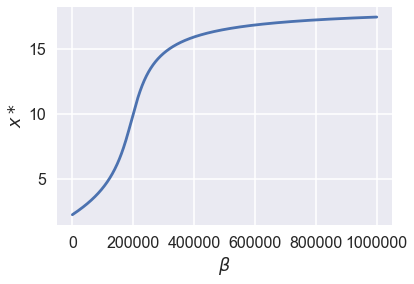

In [29]:
%matplotlib inline
# Let's plot the function
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); sns.set_context('poster')

fig, ax = plt.subplots()
ax.plot(BETA, xopt)
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$x*$")

# Multi-variate methods (based on the work from Miguel Uribe)
In this case your function depends on several variables so the solution method is much more elaborated. 

Please read https://www2.hawaii.edu/~jonghyun/classes/S18/CEE696/files/04_scipy_optimize.pdf for short introduction to the classification of multi-variate optimization problems.

The general minimization method in the case of multivariate methods is the `minimize` method. As for the `minimize_scalar` method, in `minimize` the method to be used is passed as an argument. There are many available methods to minimize multivariate functions, once again, the method to be chosen depends on the available information about the function, the available computing capacity, and the required performance.

The available methods are:
- `Nelder-Mead`
- `Powell`
- `CG`
- `BFGS`
- `Newton-CG`
- `L-BFGS-B`
- `TNC`
- `COBYLA`
- `SLSQP`
- `dogleg`
- `trust-ncg`
- `trust-exact`
- `trust-krylov`
   
Some of these methods use the information of the gradients and second order derivatives of the function to find the minimum. However, we will focus in this section on the methods that do not use additional information apart from the function itself. These methods are useful in the cases where the optimizing function is not really known or it is simply too complicated to differentiate.

## BFGS - Broyden–Fletcher–Goldfarb–Shanno algorithm : Unconstrained

The BFGS algorithm belongs to the family of quasi-Newton methods. These are methods which seek the minimum of a function be moving in the direction for which the gradient is the smallest. Normally, these methods need information regarding the gradient and the Hessian matrix (second order derivatives). However, the BFGS method is able to approximate the hessian using information regarding the gradient. If the gradient is not given either, the python implementation of the method also approximates the gradient based on different function evaluations.

More information regarding the BFGS method can be found at: https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

In [31]:
# Lets define the function to minimize
def fun2D(x):
    res=(x[0]-1)**4+5*(x[1]-1)**2-2*x[0]*x[1]
    return res


In [32]:
from scipy.optimize import minimize
# Running the minimize method to find the minimum
x0=[0,0]  # This is the initiall guess, which is mandatory
results=minimize(fun2D, x0, method='BFGS')
print(results)

# We store the optimal as x_opt
x_opt=results.x

      fun: -3.8672228877101262
 hess_inv: array([[0.11091664, 0.02064741],
       [0.02064741, 0.10048636]])
      jac: array([1.54972076e-06, 6.70552254e-06])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([1.88292645, 1.37658596])


Checking the results using matplotlib.

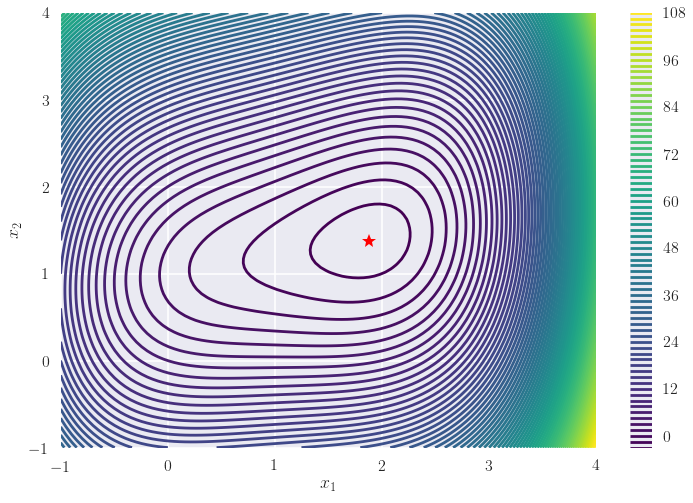

In [31]:
# Countour plots in matplotlib
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rc('text', usetex=True)
import seaborn as sns
sns.set();
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(12, 8))

x_ = y_ = np.linspace(-1, 4, 100)  # Creating 1D arrays between -4 and 4 for x an y
X, Y = np.meshgrid(x_, y_)  # With this comand we create a 100x100 2D mesh
# We create the figure and also give it an alias to change its attributes
c = ax.contour(X, Y, fun2D([X, Y]), 100, cmap='viridis') # The 50 is the number of countour lines
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15) # We plot the optimal values
ax.set_xlabel(r"$x_1$", fontsize=18)  # we set the x label
ax.set_ylabel(r"$x_2$", fontsize=18)  # we set the y label
plt.colorbar(c)                # We add a colorbar


## CG - Conjugate gradient method
The conjugate gradient method was originally proposed to iteratively solve linear equation systems but was later generalized to solve unconstrained non-linear multivariate optimization problems. It is based on an iterative approximation of the gradient of a function using the so-called conjugate vectors.

More information regarding the CG method can be found at https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_conjugate_gradient_method_as_an_iterative_method

In [33]:
# Running the minimize method to find the minimum
x0=[0,0]  # This is the initiall guess, which is mandatory
results=minimize(fun2D,x0, method='CG')
print(results)

# We store the optimal as x_opt
x_opt=results.x

     fun: -3.8672228877127957
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 72
     nit: 8
    njev: 18
  status: 0
 success: True
       x: array([1.88292612, 1.37658522])


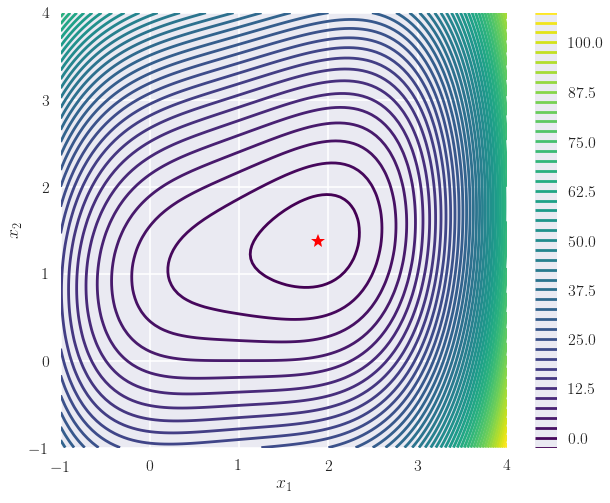

In [39]:
# Plotting the results of the CG method

fig, ax = plt.subplots(figsize=(10, 8))
x_=y_=np.linspace(-1,4,100)  # Creating 1D arrays between -4 and 4 for x an y
X, Y = np.meshgrid(x_, y_)  # With this comand we create a 100x100 2D mesh
# We create the figure and also give it an alias to change its attributes
c = ax.contour(X, Y, fun2D([X, Y]), 50, cmap="viridis") # The 50 is the number of countour lines
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15) # We plot the optimal values
ax.set_xlabel(r"$x_1$", fontsize=18)  # we set the x label
ax.set_ylabel(r"$x_2$", fontsize=18)  # we set the y label
plt.colorbar(c, ax=ax)                # We add a colorbar


## Nelder-Mead method
The Nelder-Mead method or Downhill Simplex method is a more brute force method. It creates a simplex, a generalization of a triangle (in 2D) or a tetahedron (in 3D), for the given dimension. The corners of the simplex is evaluated and according to their values the simplex is either reflected, expanded, contracted or shrunk to find a better value. As a consequence, the simplex starts to move looking for the minimum value, once it finds the minimum it starts to shrink around it. The method normally converges when the size of the simplex is smaller than the expected tolerance.

More information regarding the Nelder-Mead method can be found at https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method

In [41]:
# Running the minimize method to find the minimum
x0=[0,0]  # This is the initiall guess, which is mandatory
results=minimize(fun2D,x0, method='Nelder-Mead')
print(results)

# We store the optimal as x_opt
x_opt=results.x

 final_simplex: (array([[1.88296217, 1.37657705],
       [1.88294103, 1.3765417 ],
       [1.88289927, 1.37665667]]), array([-3.86722288, -3.86722288, -3.86722285]))
           fun: -3.867222880714701
       message: 'Optimization terminated successfully.'
          nfev: 128
           nit: 68
        status: 0
       success: True
             x: array([1.88296217, 1.37657705])


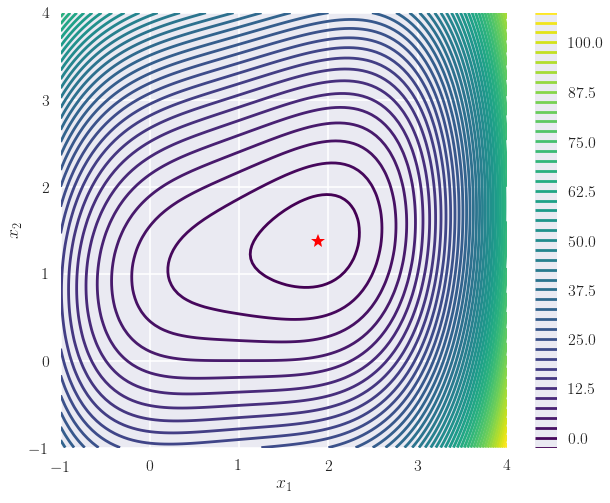

In [43]:
# Plotting the results of the CG method

fig, ax = plt.subplots(figsize=(10, 8))
x_=y_=np.linspace(-1,4,100)  # Creating 1D arrays between -4 and 4 for x an y
X, Y = np.meshgrid(x_, y_)  # With this comand we create a 100x100 2D mesh
# We create the figure and also give it an alias to change its attributes
c = ax.contour(X, Y, fun2D([X, Y]), 50, cmap='viridis') # The 50 is the number of countour lines
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15) # We plot the optimal values
ax.set_xlabel(r"$x_1$", fontsize=18)  # we set the x label
ax.set_ylabel(r"$x_2$", fontsize=18)  # we set the y label
plt.colorbar(c, ax=ax)                # We add a colorbar



It can be seen that the BFGS method is the one that requires the least amount of function evaluation, it is generally the most recomended method to start with multivariate minimization.

## What if the function is non-convex and there are several local minima.

If there are local minima, the final result strongly depends on the initial guess. Regardless the method.

In [34]:
# Let's define a 2D function with several local minima
def func2D_NC(X):
    x,y=X     # We define x,y as the contents of the X array
    res=(4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + (x - 1)**2 + (y - 1)**2
    return res

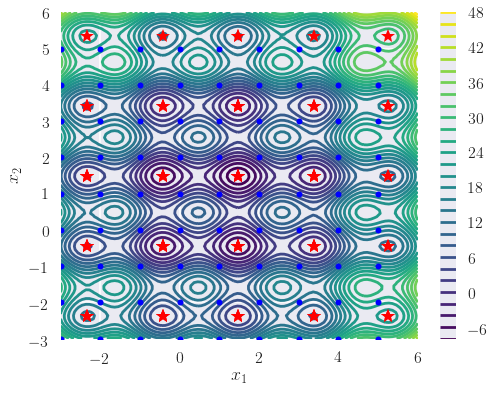

In [51]:
# Checking graphically the dependence of the BFGS method on the initial guess

## We first plot the function
fig, ax = plt.subplots(figsize=(8, 6))
x_=y_=np.linspace(-3,6,100)  # Creating 1D arrays between -4 and 4 for x an y
X, Y = np.meshgrid(x_, y_)  # With this comand we create a 100x100 2D mesh
# We create the figure and also give it an alias to change its attributes
c = ax.contour(X, Y, func2D_NC([X, Y]), 30, cmap='viridis') # The 50 is the number of countour lines
ax.set_xlabel(r"$x_1$", fontsize=18)  # we set the x label
ax.set_ylabel(r"$x_2$", fontsize=18)  # we set the y label
plt.colorbar(c, ax=ax)                # We add a colorbar

# we perform several optimization routines with different initial guesses and plot the results on the same graph

#Creating the list of initial points
x0s=[[x,y] for x in np.arange(-3,6) for y in np.arange(-3,6)]

for x0 in x0s:
    results=minimize(func2D_NC,x0, method='BFGS')
    xopt=results.x
    # We plot the initial points
    ax.plot(x0[0], x0[1], 'bo', markersize=6)
    
    # We plot the final results
    ax.plot(xopt[0], xopt[1], 'r*', markersize=15)

In fact, all methods tend to ger trapped in local minima. A possibility to overcome this problem is to perform the optimization process for a wide range of different possible initial guesses and then compare the results to find the global minima. This process, however, can lead to large computation times.

An additional possibility is to evaluate the function in a fine mesh, find the minimum value and use this value as the initial guess of a more advanced optimization method. The `optimization.brute` routine allows for this search.

In [35]:
from scipy.optimize import brute
# Performing the brute optimization over a network of points separated by 0.5
x0appr=brute(func2D_NC, (slice(-3,6,0.5),slice(-3,6,0.5)), finish=None)
# The slice objects passed as arguments are basically the x and y point distribution
# The finish=None attribute stops the method at the first iteration, otherwise it will continue using finer and finer meshes to find the global minimum
print(x0appr)

[1.5 1.5]


The brute method finds the point $(x,y)=(1.5,1.5)$ as the one that minimizes the function in the initial grid. We can now use this point as the initial guess for the optimizing routines.

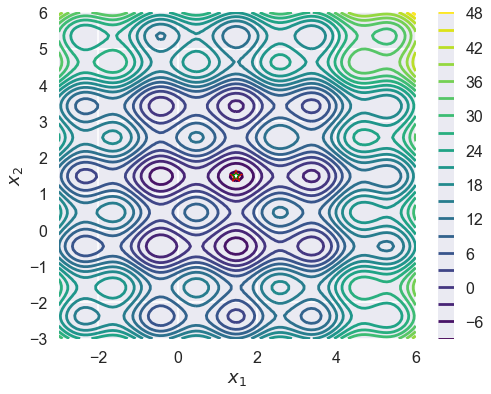

In [36]:
## We first plot the function
fig, ax = plt.subplots(figsize=(8, 6))
x_= y_ = np.linspace(-3, 6, 100)  # Creating 1D arrays between -4 and 4 for x an y
X, Y = np.meshgrid(x_, y_)  # With this comand we create a 100x100 2D mesh
# We create the figure and also give it an alias to change its attributes
c = ax.contour(X, Y, func2D_NC([X, Y]), 20, cmap='viridis') # The 50 is the number of countour lines
ax.set_xlabel(r"$x_1$", fontsize=18)  # we set the x label
ax.set_ylabel(r"$x_2$", fontsize=18)  # we set the y label
plt.colorbar(c, ax=ax)                # We add a colorbar

# The BFGS method
results=minimize(func2D_NC, x0appr, method='BFGS')
xopt=results.x
ax.plot(xopt[0], xopt[1], 'r*', markersize=15)

# The CG method
results=minimize(func2D_NC, x0appr, method='CG')
xopt=results.x
ax.plot(xopt[0], xopt[1], 'g*', markersize=10)


# The Nelder-Mead method
results=minimize(func2D_NC, x0appr, method='Nelder-Mead')
xopt=results.x
ax.plot(xopt[0], xopt[1], 'w*', markersize=5)


We can see that using the `brute` method to determine the initial guess all methods find the actual global minimum of the function.

# Multivariate methods with constraints

So far, the multivariate methods we have studied are unconstrained, which means there are no boundaries for the possible values of the variables.

In practice, however, many optimization problems are constrained. Python deals differently with three different classes of constraints:
- **bounds**: These are constraints of the type $x_i=[x_i,x_f]$. This is, the variable is restricted to a fixed range.
- **equality constraints**: These are constraints of the type $h(x)=0$, notice that in this notation $x$ is a vector of variables. Therefore, any number of variables can appear in the constraint.
- **inequality constraints**: These are constraints of the type $g(x)\geq 0$, once again $x$ denotes a vector of variables. 

The following is an example extracted from the `minimize` function manual.

In [37]:
def fun(x) : 
    return (x[0] - 1)**2 + (x[1] - 2.5)**2 # paraboloid centered at (1, 2.5)

# Define constrains, as inequalities
# the first one, for instance, implies that : x - 2y + 2 > 0
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

# define bounds: in tis case, all variables are positive
bnds = ((0, None), (0, None))

# solve using the SLSQP method
res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds, constraints=cons)

print(res)

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])


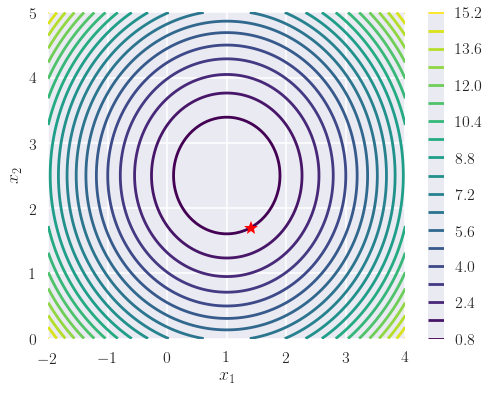

In [72]:
# plot just to check
## We first plot the function
fig, ax = plt.subplots(figsize=(8, 6))
x_ = np.linspace(-2, 4, 100)  # Creating 1D arrays between -4 and 4 for x an y
y_ = np.linspace(0, 5, 100)  # Creating 1D arrays between -4 and 4 for x an y
X, Y = np.meshgrid(x_, y_)  # With this comand we create a 100x100 2D mesh
# We create the figure and also give it an alias to change its attributes
c = ax.contour(X, Y, fun([X, Y]), 20, cmap='viridis') # The 50 is the number of countour lines
ax.set_xlabel(r"$x_1$", fontsize=18)  # we set the x label
ax.set_ylabel(r"$x_2$", fontsize=18)  # we set the y label
plt.colorbar(c, ax=ax)                # We add a colorbar

ax.plot(res.x[0], res.x[1], 'r*', markersize=15)


## Another example for multivariate problems with bounds
When constraints are bound-type, which are the easiest to handle, the `L-BFGS-B` method is recommended. As already mentioned, this method estimates the gradient and the hessian of the optimized function to find the optimal value. In this modification, it also takes into account the given bounds for the variables.

In [73]:
# Let's define a new function to estimate
def func2D(X):
    x,y=X
    return (x-1)**2+(y-1)**2

Now lets minimize this function without constraints and subjected to the constraints $2\leq x\leq 3$ and $0\leq y \leq 2$.

In [74]:
x0=[0,0]  # This is the initiall guess, which is mandatory

# optimizing without constraints
res=minimize(func2D,x0, method='BFGS')
print(res.x)

# optimizing with the constrains, we define the boundaries as tuples
bnd1,bnd2=(2,3),(0,2)
res_cons=minimize(func2D,x0, method='L-BFGS-B', bounds=[bnd1,bnd2])
print(res_cons.x)

[0.99999999 0.99999999]
[2. 1.]


To get a better understanding of the results, we can plot them

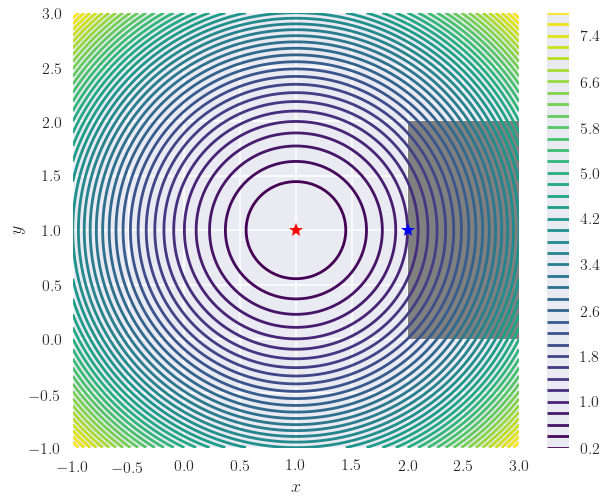

In [76]:
## We first plot the function
fig, axes1 = plt.subplots(figsize=(10, 8))   # We create the axes to plot
x_=y_=np.linspace(-1,3,100)  # Creating 1D arrays between -4 and 4 for x an y
X, Y = np.meshgrid(x_, y_)  # With this comand we create a 100x100 2D mesh
# We create the figure and also give it an alias to change its attributes
c = axes1.contour(X, Y, func2D([X, Y]), 50, cmap='viridis') # The 50 is the number of countour lines
axes1.set_xlabel(r"$x$", fontsize=18)  # we set the x label
axes1.set_ylabel(r"$y$", fontsize=18)  # we set the y label
plt.colorbar(c, ax=axes1)                # We add a colorbar

# Plotting the result for the unconstrained method
axes1.plot(res.x[0],res.x[1], 'r*', markersize=15)

# Plotting the result for the unconstrained method
axes1.plot(res_cons.x[0],res_cons.x[1], 'b*', markersize=15)

# Lets highlight the constrained region
 # we define a rectangle: Rectangle((origin), width,height)
bound=plt.Rectangle((bnd1[0],bnd2[0]),bnd1[1]-bnd1[0],bnd2[1]-bnd2[0], facecolor="grey")
axes1.add_patch(bound)

We see both minimization methods are succesful in finding the minimum under the given constraints.

## Another eample for multivariate problems with equality or inequality constraints

Dealing with equality or inequaliy constraints is a much more complicated problem and, once again, there is not a magical recipe. The most succesful analytical method is known as Lagrange multipliers, which turn the problem into an unconstrained one by adding more variables. The sequential least squares programming `SLSQP` method incorporates the Lagrange multipliers method and extends it to take into account equality and inequality constraints.

To introduce constraints into the `minimize` method, a list of dictionaries must be created.

Let's suppose we want to find the minimal value of the function above, `func2D`. This time we are restricted to the values of $x$ and $y$ which satisfy the following condition:
$$g(X)=y-1.75-(x-0.75)^4\geq 0$$

In [78]:
#We start by defining the function g(X) used in the constraint
def gcons(X):
    x,y=X
    return y-1.75-(x-0.75)**4

# We create a dictionary to define the constraint, with at least two keys: fun and type
const={'type':'ineq', 'fun':gcons}

# We now call the optimization with and without constrains
# optimizing without constraints
res=minimize(func2D,x0, method='BFGS')
print(res.x)

# optimizing with the constraint g(x)>=0
res_cons=minimize(func2D,x0, method='SLSQP', constraints=const)
print(res_cons.x)

[0.99999999 0.99999999]
[0.96857656 1.75228252]


Once again we can get a better understanding of the solutions in a figure

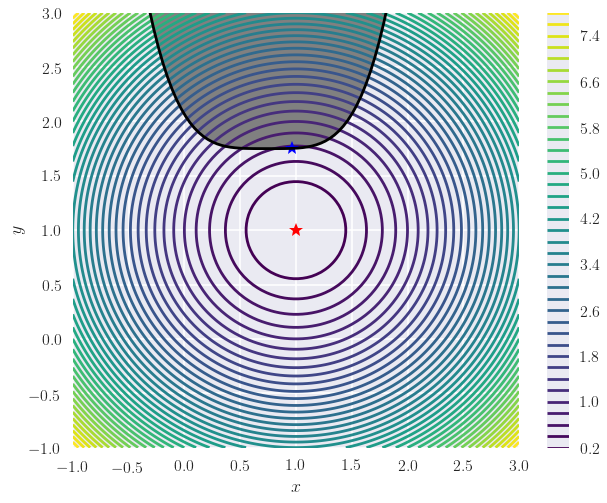

In [81]:
## We first plot the function
fig, axes1 = plt.subplots(figsize=(10, 8))   # We create the axes to plot
x_=y_=np.linspace(-1,3,100)  # Creating 1D arrays between -4 and 4 for x an y
X, Y = np.meshgrid(x_, y_)  # With this comand we create a 100x100 2D mesh
axes1.set_ylim(-1,3)         # Forces the limits of y to be between (-1,3)
# We create the figure and also give it an alias to change its attributes
c = axes1.contour(X, Y, func2D([X, Y]), 50, cmap='viridis') # The 50 is the number of countour lines
axes1.set_xlabel(r"$x$", fontsize=18)  # we set the x label
axes1.set_ylabel(r"$y$", fontsize=18)  # we set the y label
plt.colorbar(c, ax=axes1)                # We add a colorbar

# Plotting the result for the unconstrained method
axes1.plot(res.x[0],res.x[1], 'r*', markersize=15)

# Plotting the result for the constrained method
axes1.plot(res_cons.x[0],res_cons.x[1], 'b*', markersize=15)

# Lets highlight the constrained region
axes1.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)   # Adds the black line
axes1.fill_between(x_,1.75+(x_-0.75)**4, 3, color='grey')  # Adds the grey shadowing

Once again, the minimization procedure works well.

# Exercises (always use `minimize` or `minimize_scalar` )

<img src="fig/opt-exer-01.png">

---
***
<img src="fig/opt-exer-02.png">

---
---
<img src="fig/opt-exer-03.png">
<img src="fig/opt-exer-04.png">

---
---
<img src="fig/opt-exer-05.png">

---
---
<img src="fig/opt-exer-06.png">


[-10.   0.]


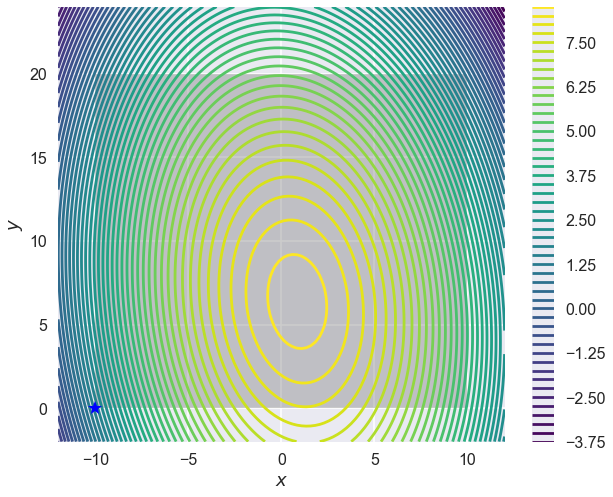

In [41]:
# Let's define a new function to estimate
def func2D(X):
    x,y=X
    return 7.9 + 0.13*x + 0.21*y - 0.05*x*x - 0.016*y*y - 0.007*x*y

x0=[0,1]  # This is the initiall guess, which is mandatory

# optimizing with the constrains, we define the boundaries as tuples
bnd1,bnd2=(-10,10),(0,20)
res_cons=minimize(func2D,x0, method='L-BFGS-B', bounds=[bnd1,bnd2])
print(res_cons.x)

## We first plot the function
fig, axes1 = plt.subplots(figsize=(10, 8))   # We create the axes to plot
x_=np.linspace(-12,12,100)  # Creating 1D arrays between -4 and 4 for x an y
y_=np.linspace(-2,24,100)  # Creating 1D arrays between -4 and 4 for x an y
X, Y = np.meshgrid(x_, y_)  # With this comand we create a 100x100 2D mesh
# We create the figure and also give it an alias to change its attributes
c = axes1.contour(X, Y, func2D([X, Y]), 50, cmap='viridis') # The 50 is the number of countour lines
axes1.set_xlabel(r"$x$", fontsize=18)  # we set the x label
axes1.set_ylabel(r"$y$", fontsize=18)  # we set the y label
plt.colorbar(c, ax=axes1)                # We add a colorbar

# Plotting the result for the unconstrained method
axes1.plot(res_cons.x[0],res_cons.x[1], 'b*', markersize=15)

# Lets highlight the constrained region
# we define a rectangle: Rectangle((origin), width,height)
bound=plt.Rectangle((bnd1[0],bnd2[0]),bnd1[1]-bnd1[0],bnd2[1]-bnd2[0], facecolor="grey", alpha=0.4)
axes1.add_patch(bound)

---
---
<img src="fig/opt-exer-07-A.png">
<img src="fig/opt-exer-07-B.png">

---
---
<img src="fig/opt-exer-08.png">